In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from HelperFunctions import *
from PtOccupancyFunctions import *
import scipy.integrate
import pprint
import re

In [2]:
# path = "/home/helge/Applications/matsim/matsim-bimodal/scenarios/fine_grid/bimodal/output/merge/"
# path = "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingTTConstraint3Seed324/100000reqs/"


path = "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/"
path2 = "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing600Beta/100000reqs/"

In [3]:
def getDirsFleetSizes(directory, mode="bimodal"):
    result = []
    sub_dirs = []
    sdirs = [
        sdir.path
        for sdir in
            os.scandir(directory)
        if sdir.is_dir() and "drt" in sdir.name
    ]

    for sdir in sorted(sdirs, key=lambda x: int(re.search("\d+",x.split("/")[-1])[0])):
        subresult = {}
        subresult["root"] = sdir
        for root, subdirs, files in os.walk(sdir):
            subroot = root.replace(directory,"")
            for file in files:
                if file=="0.trips.csv.gz" and mode in subroot:
                    subresult["trips"] = os.path.join(root, file)
                if file=="0.vehicleDistanceStats_drt.csv" and mode in subroot:
                    subresult["drt_dists"] = os.path.join(root, file)
                if file=="trip_success.csv.gz" and mode in subroot:
                    subresult["trip_success"] = os.path.join(root, file)
                if file=="0.CummulativePtDistance.txt" and mode in subroot:
                    subresult["pt_dist"] = os.path.join(root, file)
                if file=="0.drt_occupancy_time_profiles_drt.txt" and mode in subroot:
                    subresult["drt_occupancy"] = os.path.join(root, file)
                if file=="0.occupancyAnalysis.txt" and mode in subroot:
                    subresult["pt_occupancy"] = os.path.join(root, file)
                if file=="0.drt_trips_drt.csv" and mode in subroot:
                    subresult["drt_trips"] = os.path.join(root, file)
                if file=="0.drt_detours_drt.csv" and mode in subroot:
                    subresult["drt_detours"] = os.path.join(root, file)
                if file=="ph_modestats.txt" and mode in subroot:
                    subresult["ph_modestats"] = os.path.join(root, file)
                if file=="pkm_modestats.txt" and mode in subroot:
                    subresult["pkm_modestats"] = os.path.join(root, file)
                    
        result.append(subresult)
    
    return result

def getCarDir(directory):
    result = {}
    result["root"] = getDir(directory, "car")
    for root, subdirs, files in os.walk(result["root"]):
        for file in files:
            if file=="0.trips.csv.gz":
                result["trips"] = os.path.join(root, file)
            if file=="trip_success.csv.gz" and "unimodal" not in root:
                result["trip_success"] = os.path.join(root, file)
    
    return result

def getDir(path, directory):
    for root, subdirs, files in os.walk(path):
        for subdir in subdirs:
            if subdir == directory:
                return os.path.join(root, subdir)

 
bim_dirs = getDirsFleetSizes(path, mode="unimodal")
bim_dirs2 = getDirsFleetSizes(path2, mode="unimodal")
# car_dir = getCarDir(path)
n_sims = len(bim_dirs)
n_sims2 = len(bim_dirs2)
print(n_sims)

80


In [4]:
pprint.pprint(bim_dirs)
# print('\n---\n')
# pprint.pprint(uni_dirs)
print('\n---\n')
# pprint.pprint(car_dir)

[{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/200drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
  'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/200drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
  'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/200drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
  'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/200drt/unimodal/ITERS/it.0/0.drt_trips_drt.csv',
  'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/200drt/unimodal/ph_modestats.txt',
  'pkm_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/1000

  'pkm_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/820drt/unimodal/pkm_modestats.txt',
  'pt_dist': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/820drt/unimodal/ITERS/it.0/0.CummulativePtDistance.txt',
  'root': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/820drt',
  'trip_success': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/820drt/unimodal/trip_success.csv.gz',
  'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/820drt/unimodal/ITERS/it.0/0.trips.csv.gz'},
 {'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/830drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
  'drt_dists': '/scratch01.local/h

  'pt_dist': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/890drt/unimodal/ITERS/it.0/0.CummulativePtDistance.txt',
  'root': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/890drt',
  'trip_success': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/890drt/unimodal/trip_success.csv.gz',
  'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/890drt/unimodal/ITERS/it.0/0.trips.csv.gz'},
 {'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/900drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
  'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacing0Beta/100000reqs/900drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
  'drt_occupan

In [5]:
def getTrips(paths, mode):
    if mode == "bimodal":
        columns=["person","trav_time","wait_time","traveled_distance","modes"]
    elif mode == "unimodal":
        columns=["person","trav_time","wait_time"]
    elif mode == "car":
        columns=["person", "traveled_distance", "trav_time"]
    path = paths["trips"]
    df = pd.read_csv(path, sep=";").loc[:,columns]
    df["trav_time"] = df["trav_time"].apply(timestmp2sec)
    df.set_index("person", inplace=True)
    if mode=="car":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "traveled_distance": np.sum
            }
        )
        return df
    df["wait_time"] = df["wait_time"].apply(timestmp2sec)
    if mode=="unimodal":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "wait_time": np.sum,
            }
        )
        return df
    if mode == "bimodal":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "wait_time": np.sum,
                "traveled_distance": np.sum,
                "modes": combineModesSeriesStr,
            }
        )
        return df
    
def getFleetSize(path):
    return re.search("\d+", path.split("/")[-1])[0]

def getEll(path):
    return path.split("/")[-1].split("_")[-1]

def getModeStats(paths, columns_ph, columns_pkm):
    path_ph = paths["ph_modestats"]
    path_pkm = paths["pkm_modestats"]
    df_ph = pd.read_csv(path_ph, sep='\t').loc[:,columns_ph]
    df_pkm = pd.read_csv(path_pkm, sep='\t').loc[:,columns_pkm]
    return df_ph.to_numpy()[0], df_pkm.to_numpy()[0]

def getDrtVehicleDistances(paths):
    path = paths["drt_dists"]
    df = pd.read_csv(path, sep=";")["drivenDistance_m"]
    return df

def getTripSuccess(paths):
    path = paths["trip_success"]
    df = pd.read_csv(path, sep=";", index_col="personId")
    return df

def getCummulativePtDistance(paths):
    path = paths["pt_dist"]
    df = pd.read_csv(path).values[0, 0]
    return df

def getDrtOccupandyAndStandingFrac(paths, exclude_empty_vehicles, count_idle_vehicles=False):
    path = paths["drt_occupancy"]
    df = pd.read_csv(path, sep="\t")
    df["time"] = df["time"].apply(timestmphm2sec)
    drt_occ, drt_deviation = getAverageOcc(
        df.drop(columns="time"), exclude_empty_vehicles=exclude_empty_vehicles, count_idle_vehicles=count_idle_vehicles
    )
    drt_standing_frac = getStandingFraction(df.drop(columns="time"))
    return drt_occ, drt_standing_frac

def getPtOccupancy(paths):
    path = paths["pt_occupancy"]
    av_pt_occ, av_pt_occ_sq, n_pt = getPtOccupancies(
        path, 600
    )
    t_av_pt_occ_av = getAverageTimeSeries(av_pt_occ)
    sigma = np.sqrt(n_pt / (n_pt - 1)) * np.sqrt(
        av_pt_occ_sq - av_pt_occ ** 2
    )
    t_av_pt_occ_sigma = getAverageTimeSeries(sigma)
    return t_av_pt_occ_av, t_av_pt_occ_sigma

def getDrtTrips(paths):
    path = paths["drt_trips"]
    df = pd.read_csv(path, sep=";").loc[:, ["personId", "travelDistance_m", "waitTime", "travelTime"]]
    df.set_index("personId", inplace=True)
    df = df.groupby("personId").agg(
        {
            "waitTime": np.sum,
            "travelTime": np.sum,
            "travelDistance_m": np.sum,
        }
    )
    return df

def getDrtDetours(paths):
    path = paths["drt_detours"]
    df = pd.read_csv(path, sep=";").loc[
        :, "distanceDetour"
    ]
#     df = df[df < 10]
    return df

# display(getTrips(bim_dirs[0], "bimodal"))

In [8]:
data = np.empty((13, n_sims))

saved_path = os.path.join(path, "saved.npy")
if False:#os.path.isfile(saved_path):
    data = np.load(saved_path)
else:
    for i,dic in enumerate(bim_dirs):
        data[0,i] = getFleetSize(dic["root"])
        print("Fleet Size: ", data[0,i])
        trips = getTrips(dic, "unimodal")
        drt_trips = getDrtTrips(dic)
        trip_succ = getTripSuccess(dic)
        data[4,i], data[11,i] = getDrtOccupandyAndStandingFrac(dic, False)
        data[3,i], _ = getDrtOccupandyAndStandingFrac(dic, True)
        data[2,i], _ = getDrtOccupandyAndStandingFrac(dic, False, True)
        drt_detours = getDrtDetours(dic)
        data[1,i] = getDrtVehicleDistances(dic).sum()
        data[7,i] = len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ)
        print("Servability: ", data[7,i])
        data[9,i] = drt_detours.mean()
        data[10,i] = trips["trav_time"].mean()
        data[5,i] = trips["wait_time"].mean()
        data[6,i] = drt_trips["waitTime"].mean()
        data[12,i] = drt_trips["travelTime"].mean()

        print("-----")
    np.save(saved_path, data)
        
fleet_list = data[0,:]
cummulative_drt_bimodal = data[1,:]
av_drt_occs = data[2,:]
av_drt_occs_non_empty = data[3,:]
av_drt_occs_non_standing = data[4,:]
wait_times = data[5,:]
wait_times_drt = data[6,:]
serviced_fracts = data[7,:]
av_pt_occs = data[8,:]
av_detours = data[9,:]
tt_bimodal = data[10,:]
standing_fractions = data[11,:]
drt_rt = data[12,:]

print("Loaded Data")

Fleet Size:  200.0
Servability:  0.23076
-----
Fleet Size:  210.0
Servability:  0.24678
-----
Fleet Size:  220.0
Servability:  0.26425
-----
Fleet Size:  230.0
Servability:  0.27728
-----
Fleet Size:  240.0
Servability:  0.29418
-----
Fleet Size:  250.0
Servability:  0.31157
-----
Fleet Size:  260.0
Servability:  0.32787
-----
Fleet Size:  270.0
Servability:  0.34594
-----
Fleet Size:  280.0
Servability:  0.3625
-----
Fleet Size:  290.0
Servability:  0.37876
-----
Fleet Size:  300.0
Servability:  0.3973
-----
Fleet Size:  310.0
Servability:  0.41482
-----
Fleet Size:  320.0
Servability:  0.43343
-----
Fleet Size:  330.0
Servability:  0.44983
-----
Fleet Size:  340.0
Servability:  0.4706
-----
Fleet Size:  350.0
Servability:  0.48673
-----
Fleet Size:  360.0
Servability:  0.50818
-----
Fleet Size:  370.0
Servability:  0.52556
-----
Fleet Size:  380.0
Servability:  0.54647
-----
Fleet Size:  390.0
Servability:  0.56943
-----
Fleet Size:  400.0
Servability:  0.58546
-----
Fleet Size:  410

In [9]:
# trips_car = getTrips(car_dir, "car")
# cummulative_car_dist = trips_car["traveled_distance"].sum()
# tt_car = trips_car["trav_time"].mean()

In [10]:
data2 = np.empty((13, n_sims2))

saved_path2 = os.path.join(path2, "saved.npy")
if os.path.isfile(saved_path2):
    data2 = np.load(saved_path2)
else:
    for i,dic in enumerate(bim_dirs2):
        data2[0,i] = getFleetSize(dic["root"])
        print("Fleet Size: ", data2[0,i])
        trips = getTrips(dic, "unimodal")
        drt_trips = getDrtTrips(dic)
        trip_succ = getTripSuccess(dic)
        data2[4,i], data2[11,i] = getDrtOccupandyAndStandingFrac(dic, False)
        data2[3,i], _ = getDrtOccupandyAndStandingFrac(dic, True)
        data2[2,i], _ = getDrtOccupandyAndStandingFrac(dic, False, True)
        drt_detours = getDrtDetours(dic)
        data2[1,i] = getDrtVehicleDistances(dic).sum()
        data2[7,i] = len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ)
        print("Servability: ", data2[7,i])
        data2[9,i] = drt_detours.mean()
        data2[10,i] = trips["trav_time"].mean()
        data2[5,i] = trips["wait_time"].mean()
        data2[6,i] = drt_trips["waitTime"].mean()
        data2[12,i] = drt_trips["travelTime"].mean()

        print("-----")
    np.save(saved_path2, data2)
        
fleet_list2 = data2[0,:]
cummulative_drt_bimodal2 = data2[1,:]
av_drt_occs2 = data2[2,:]
av_drt_occs_non_empty2 = data2[3,:]
av_drt_occs_non_standing2 = data2[4,:]
wait_times2 = data2[5,:]
wait_times_drt2 = data2[6,:]
serviced_fracts2 = data2[7,:]
av_pt_occs2 = data2[8,:]
av_detours2 = data2[9,:]
tt_bimodal2 = data2[10,:]
standing_fractions2 = data2[11,:]
drt_rt2 = data2[12,:]

print("Loaded Data")

Loaded Data


In [11]:
# print(drt_rt)
# print(tt_bimodal-wait_times)

# plt.scatter(range(n_sims),drt_rt)
# plt.scatter(range(n_sims), tt_bimodal-wait_times)
# plt.show()

In [12]:
cummulative_car_dist = 1
tt_car = 1
cummulative_drt_bimodal_rescaled = cummulative_drt_bimodal / cummulative_car_dist
tt_bimodal_rescaled = tt_bimodal / tt_car
wait_times_rescaled = wait_times / tt_car

cummulative_drt_bimodal_rescaled2 = cummulative_drt_bimodal2 / cummulative_car_dist
tt_bimodal_rescaled2 = tt_bimodal2 / tt_car
wait_times_rescaled2 = wait_times2 / tt_car

In [13]:
def finiteDiffBound3(f, dx):
    return (-3/2*f[0] + 2*f[1] - 1/2*f[2])/dx

def finiteDiffBound4(f, dx):
    return (2*f[0] - 5*f[1] + 4*f[2] - f[3])/dx**2

def finiteDiffBound5(f, dx):
    return (-5/2*f[0] + 9*f[1] - 12*f[2] + 7*f[3] - 3/2*f[4])/dx**3

In [14]:
rejection_rate = 1 - serviced_fracts
rejection_rate2 = 1 - serviced_fracts2
rej_grad = np.gradient(rejection_rate, fleet_list)
idx_min_grad = np.argmin(rej_grad) + 1
crit_fleetsize = fleet_list[idx_min_grad]# + 0.1
crit_rej_offset = rejection_rate[idx_min_grad]# - 0.01

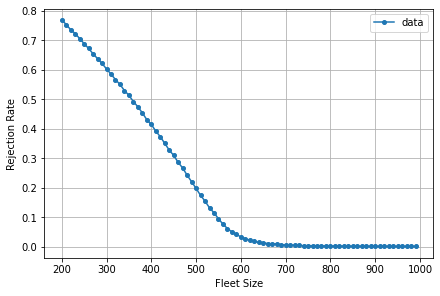

In [15]:
from matplotlib.ticker import MaxNLocator
%matplotlib inline

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, rejection_rate, "o-", ms=4, label="data")
# ax.plot(fleet_list2, rejection_rate2, "o", ms=2, label="2")
# ax.axvline(crit_fleetsize, ls='--', c='orange')
# m = (serviced_fracts[-1] - serviced_fracts[0])/100
# b = serviced_fracts[0]
# new_x = np.array([180, 380])
# ax.plot(new_x, m*(new_x-180)+b)

ax.set_xlabel("Fleet Size")
ax.set_ylabel("Rejection Rate")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# fig.suptitle(r"$125\cdot 10^3$" + " requests " + r"$(\nu={}\,\mathrm{{s}}^{{-1}})$".format(round(125*10**3/(10*3600), 3)))
# fig.suptitle(r"$10^5$" + " reqs " + r"$(f={})$".format(round(10**5/9*1/15,1)))

# ax.set_ylim(0,1.1)
ax.grid()
ax.legend()

# fig.savefig("125e3ReqsUnimodal.jpg", dpi=200)
# fig.savefig("VaryFleetSizeTTConstraint.png", dpi=200)
# fig.savefig("figures/VaryFleetSizeTTConstraintNoQueueCheck.jpg", dpi=200)
# plt.savefig("figures/VaryFleetSizeSelInsSearch.jpg", dpi=200)
# plt.savefig("figures/DrtRejectionRateUnimodal", dpi=300)
plt.show()

<IPython.core.display.Javascript object>


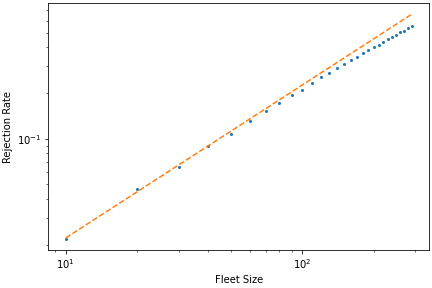

[ 1.00722943 -6.12524846]


In [16]:
from matplotlib.ticker import MaxNLocator
from scipy.optimize import curve_fit
%matplotlib notebook

fig, ax = plt.subplots(constrained_layout=True)

order_param = (crit_fleetsize-fleet_list)#/crit_fleetsize
idx = np.where(order_param > 0)
order_param = order_param[idx][::-1]
rejection_rate_reordered = rejection_rate[idx][::-1]

x_log = np.log(order_param)
y_log = np.log(rejection_rate_reordered-crit_rej_offset)
def linFunc(x, a, b):
    return a*x + b
popt, pcov = curve_fit(linFunc, x_log[:3], y_log[:3])
print(popt)
# print("Critical Exponent: ", popt[0])
# print("Crit. Exp. (Finite Differences): ", finiteDiffBound4(y_log[:4], x_log[3] - x_log[0]))

ax.plot(order_param, rejection_rate_reordered-crit_rej_offset, "o", ms=2)
x_plotlims = ax.get_xlim()
y_plotlims = ax.get_ylim()
ax.plot(order_param, np.exp(popt[1])*order_param**popt[0], ls='--')

# ax.set_xlim(x_plotlims)
# ax.set_ylim(y_plotlims)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Fleet Size")
ax.set_ylabel("Rejection Rate")
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# fig.suptitle(r"$125\cdot 10^3$" + " requests " + r"$(\nu={}\,\mathrm{{s}}^{{-1}})$".format(round(125*10**3/(10*3600), 3)))

# fig.savefig("125e3ReqsUnimodal.jpg", dpi=200)
plt.show()

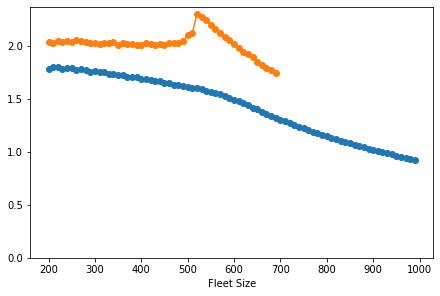

In [17]:
%matplotlib inline
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_drt_occs, 'o-')
ax.plot(fleet_list2, av_drt_occs2, 'o-')

ax.set_xlabel("Fleet Size")
ax.set_ylim(0,None)

plt.show()

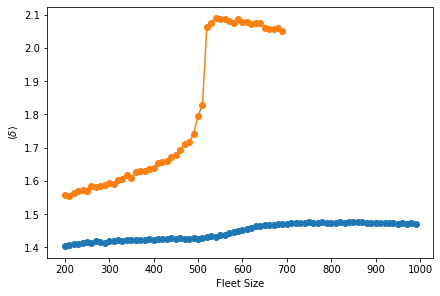

In [18]:
%matplotlib inline

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_detours, 'o-')
ax.plot(fleet_list2, av_detours2, 'o-')

ax.set_xlabel("Fleet Size")
ax.set_ylabel(r"$\langle\delta\rangle$")
# ax.set_ylim(0,av_detours.max()*1.1)

plt.show()

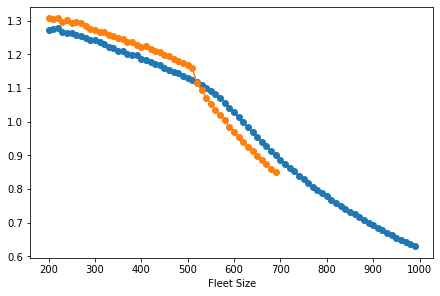

In [19]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_drt_occs/av_detours, 'o-')
ax.plot(fleet_list2, av_drt_occs2/av_detours2, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

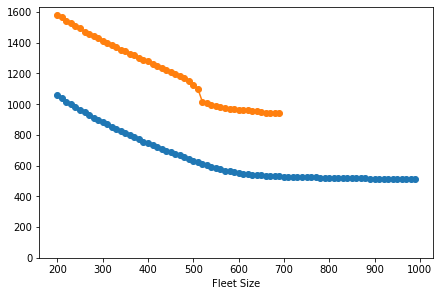

In [20]:
fig, ax = plt.subplots(constrained_layout=True)

def fitFunc(x,a,b,c):
    return a/x**b + c

# popt, pcov = curve_fit(fitFunc, fleet_list2, tt_bimodal_rescaled2, p0=[100, 0.5, 500])
#Normalize by TT for private car
ax.plot(fleet_list, tt_bimodal_rescaled, 'o-')
ax.plot(fleet_list2, tt_bimodal_rescaled2, 'o-')
# ax.plot(fleet_list2, fitFunc(fleet_list2, *popt))
# print(popt)

ax.set_ylim(0,None)
ax.set_xlabel("Fleet Size")

plt.show()

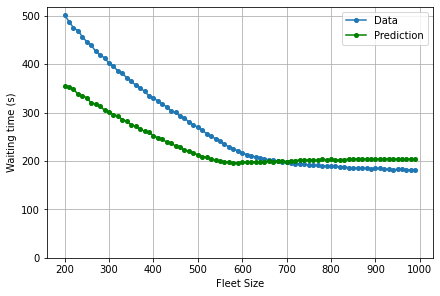

In [22]:
fig, ax = plt.subplots(constrained_layout=True)

def fitFunc(x,a, b, c):
    return a*np.exp(-b*x)+c

# popt, pcov = curve_fit(fitFunc, fleet_list, wait_times_rescaled)

#Normalize by TT for private car
ax.plot(fleet_list, wait_times_rescaled, 'o-', ms=4, label="Data")
ax.plot(fleet_list, av_drt_occs_non_standing*drt_rt/3, "o-", ms=4, color="green", label="Prediction")
# ax.plot(fleet_list2, wait_times_rescaled2, 'o-')
# ax.plot(fleet_list, fitFunc(fleet_list, *popt))
# print(popt)

ax.set_xlabel("Fleet Size")
ax.set_ylabel("Waiting time (s)")
ax.set_ylim(0,None)
ax.grid()
ax.legend()

# fig.savefig("figures/DrtWaitingTimeCompUnimodal", dpi=300)

plt.show()

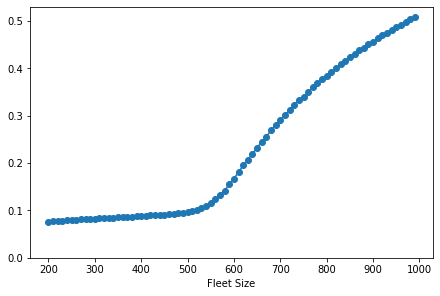

In [24]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, standing_fractions, 'o-')
# ax.plot(fleet_list2, standing_fractions2, 'o-')

ax.set_xlabel("Fleet Size")
ax.set_ylim(0,None)

# fig.savefig("figures/IdlingFractionUnimodal", dpi=300)
plt.show()

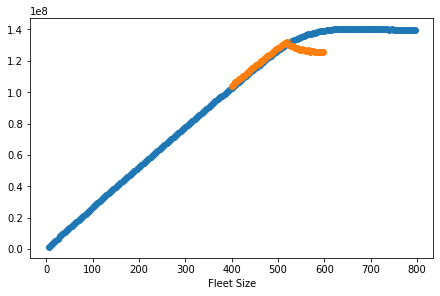

In [310]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, cummulative_drt_bimodal_rescaled, 'o-')
ax.plot(fleet_list2, cummulative_drt_bimodal_rescaled2, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
def isParetoEfficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

In [ ]:
costs = np.stack((cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled), axis=1)

In [ ]:
%matplotlib inline

pareto_efficient = isParetoEfficient(costs)
fig, ax = plt.subplots(constrained_layout=True)

scatter = ax.scatter(cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled, c=pareto_efficient)
# ax.plot(cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled)
handles, labels = scatter.legend_elements()
labels = ["pareto unoptimal", "pareto optimal"]

ax.set_xlabel("driven_distance_bimodal / driven_distance_car")
ax.set_ylabel("tt_bimodal / tt_car")
ax.legend(handles, labels)
# fig.colorbar(scatter)

plt.show()

In [ ]:
x = np.linspace(0.0001,10,100)
y = np.sqrt(x)
log_x = np.log(x)
log_y = np.log(y)

plt.figure()

plt.plot(log_x,log_y)
plt.grid()

plt.show()

print("Exp: 1/2")